# Making Weapons

## Try me
[![Open In Colab](../../_static/binder_badge.png)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/CLP/solved/Making%20weapons%20(solved%20Graphic).ipynb)[![Binder](../../_static/binder_badge.png)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FCLP%2Fsolved%2FMaking%20weapons%20(solved%20Graphic).ipynb)

## Problem Definition
Din Djarin is a retired bounty hunter that now runs a small factory specialised in making classic weapons in a colony recently re-established in Mandalore. The factory manufactures two different types of weapons, swords and spears. Din uses special alloys, mixtures of metals and rare materials, which have made a name for the endurance of his weapons across the colony. The table below shows the weight in pounds of each material needed to make each type of weapon:

| Metal    | spear | sword |
|----------|-------|-------|
| Beskar   |   1   |  0.5  |
| Tungsten |   1   |   1   |
| Titanium |   3   |   1   |

And the table below shows the total amount of each metal available, also in pounds: 

| Metal    | Amount |
|----------|--------|
|  Beskar  |  125   |
| Tungsten |  225   |
| Titanium |  300   |

The price of a spade is 40 credits and the price of a sword is 5 credits. Din has already sold 100 swords, so he needs to manufacture at least that many. 

**Find the optimal number of spades and swords that maximise revenues**

## Model

The objective is to maximise the revenues obtained with the sales of both types of weapons. 
The objective function can be modeled as:

$\max z = 40x_{1} + 5x_{2}$

where z represents the objective variable (profits) and the decision variables are:


- $x_{1}$: units of spears

- $x_{2}$: units of swords

Let us for now consider that they are real and non-negative. 

The objective function is subject to the following constraints:

Metal availability constraints: 

$x_{1} + 0.5x_{2} \leq 125$

$x_{1} + x_{2} \leq 225$

$3x_{1} + x_{2} \leq 300$

And the demand on swords:

$x_{2} \geq 100$



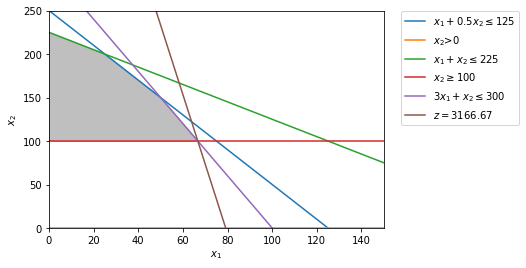

In [3]:
# Import the numpy and pyplot libraries, we set the aliases np and plt so that it is easier to use 
import numpy as np
import matplotlib.pyplot as plt

# We set the mode inline of matplotlib to get the result at the output of the cell code
%matplotlib inline
# Construct lines, in our coordinate system x represents our decision variable x1 and y represents our decision variable x2

x=np.linspace(0,300,2000) #2000 numbers from 0 to 300

y1=(125-x)/0.5 # Beskar constraint 
y2=x*0         # non negativity constraint
y3=225-x       # Tungsten constraint
y4=100+x*0     # Demand constraint
y5=300-3*x     # Titanium constraint

# Solution with objective value
y8=(3166.67-40*x)/5 # we clear the x2 with the value of z

#1. Plot the lines
plt.plot(x,y1,label=r'$x_{1}+0.5x_{2}\leq125$')
plt.plot(x,y2,label=r'$x_{2}\greater0$')
plt.plot(x,y3,label=r'$x_{1}+x_{2}\leq225$')
plt.plot(x,y4,label=r'$x_{2}\geq100$')
plt.plot(x,y5,label=r'$3x_{1}+x_{2}\leq300$')
plt.plot(x,y8,label=r'$z=3166.67$')

#2. Adjust axis
plt.xlim((0,150))
plt.ylim((0,250))
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')

#3. Fill feasible region
y6=np.minimum(y1,y3) #Line representing the minimum between y6 and y2
y7=np.minimum(y6,y5) #Line representing the minimum between y6 and y5
plt.fill_between(x,y7,y4,where=y7>y4,color='grey',alpha=0.5)

#4. Plot legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
